# Actividad 1 - Variables _dummy_ y MLR

In [1]:
personalidad <- data.frame(
    "escala_ep" = c(64, 75.6, 60.6, 69.3, 63.7, 53.3, 55.7, 70.4, 37.7, 53.5, 33.9, 78.6, 46, 38.7, 65.8, 68.4, 41.9, 55, 32.1, 50.1, 52.1, 56.6, 51.8, 51.7, 25.6, 23.1, 32.8, 43.5, 12.2, 35.4, 28, 41.9),
    "sexo" = c("Masculino", "Masculino", "Masculino", "Masculino", "Masculino", "Masculino", "Masculino", "Masculino", "Masculino", "Masculino", "Masculino", "Masculino", "Masculino", "Masculino", "Masculino", "Masculino", "Femenino", "Femenino", "Femenino", "Femenino", "Femenino", "Femenino", "Femenino", "Femenino", "Femenino", "Femenino", "Femenino", "Femenino", "Femenino", "Femenino", "Femenino", "Femenino"),
    "rol" = c("Honesto", "Honesto", "Honesto", "Honesto", "Honesto", "Honesto", "Honesto", "Honesto", "Sexista", "Sexista", "Sexista", "Sexista", "Sexista", "Sexista", "Sexista", "Sexista", "Honesto", "Honesto", "Honesto", "Honesto", "Honesto", "Honesto", "Honesto", "Honesto", "Sexista", "Sexista", "Sexista", "Sexista", "Sexista", "Sexista", "Sexista", "Sexista")
    #,stringsAsFactors = FALSE
)
head(personalidad, n=5)

escala_ep,sexo,rol
<dbl>,<fct>,<fct>
64.0,Masculino,Honesto
75.6,Masculino,Honesto
60.6,Masculino,Honesto
69.3,Masculino,Honesto
63.7,Masculino,Honesto


Creamos las variables dummy:

In [2]:
# Como sólo necesitamos crear dummies una vez, lo ejecutamos con ::
personalidad_dumm <- fastDummies::dummy_cols(personalidad)
head(personalidad_dumm, n=5)

escala_ep,sexo,rol,sexo_Masculino,sexo_Femenino,rol_Honesto,rol_Sexista
<dbl>,<fct>,<fct>,<int>,<int>,<int>,<int>
64.0,Masculino,Honesto,1,0,1,0
75.6,Masculino,Honesto,1,0,1,0
60.6,Masculino,Honesto,1,0,1,0
69.3,Masculino,Honesto,1,0,1,0
63.7,Masculino,Honesto,1,0,1,0


Calculamos el modelo de MLR:

In [3]:
personalidad_lm <- lm(data=personalidad_dumm, formula=escala_ep ~ sexo + rol)
summary(personalidad_lm)$coefficients
summary(personalidad_lm)$r.squared

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),47.0750,3.420409,13.762973,3.025927e-14
sexoMasculino,18.8375,3.949548,4.769533,4.812044e-05
rolSexista,-14.9250,3.949548,-3.778913,7.266592e-04


[1] 0.5607965

Graficamos los coeficientes:

Learn more about sjPlot with 'browseVignettes("sjPlot")'.


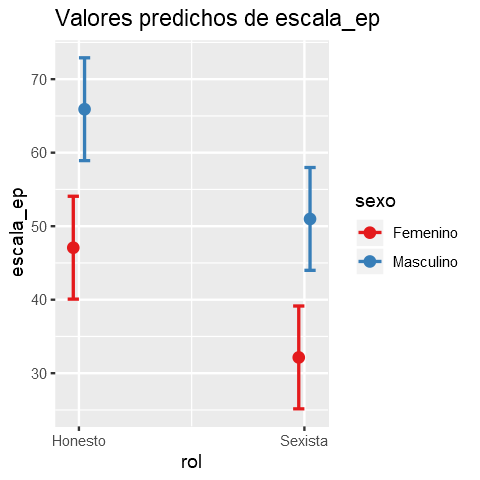

In [4]:
library(sjPlot)
options(repr.plot.width=4, repr.plot.height=4)
plot_model(personalidad_lm, type = "eff", terms = c("rol", "sexo"), title="Valores predichos de escala_ep")

Calculamos el modelo de MLR de las variables _dummy_ sexo_Masculino y rol_Sexista, y creamos el gráfico para guardarlo en una variable:

In [5]:
personalidad_hs_lm <- lm(data=personalidad_dumm, formula=escala_ep ~ sexo_Masculino + rol_Sexista)
summary(personalidad_hs_lm)$coefficients 
summary(personalidad_hs_lm)$r.squared
plt_sexM <- plot_model(personalidad_hs_lm, type = "eff", terms = c("rol_Sexista", "sexo_Masculino"), title = "Sexista M")

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),47.0750,3.420409,13.762973,3.025927e-14
sexo_Masculino,18.8375,3.949548,4.769533,4.812044e-05
rol_Sexista,-14.9250,3.949548,-3.778913,7.266592e-04


[1] 0.5607965

Hacemos lo mismo, pero con un modelo de sexo_Femenino y rol_Honesto:

In [6]:
library(sjPlot)
personalidad_fs_lm <- lm(data=personalidad_dumm, formula=escala_ep ~ sexo_Femenino + rol_Honesto)
# Extraemos la tabla de coeficientes:
summary(personalidad_fs_lm)$coefficients
summary(personalidad_fs_lm)$r.squared
# Guardamos el gráfico en una variable:
plt_sexF <-plot_model(personalidad_fs_lm, type = "pred", terms = c("rol_Honesto", "sexo_Femenino"), title="Honesto F")

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),50.9875,3.420409,14.906842,3.944214e-15
sexo_Femenino,-18.8375,3.949548,-4.769533,4.812044e-05
rol_Honesto,14.9250,3.949548,3.778913,7.266592e-04


[1] 0.5607965

Imprimimos los gráficos lado a lado, para comparar:

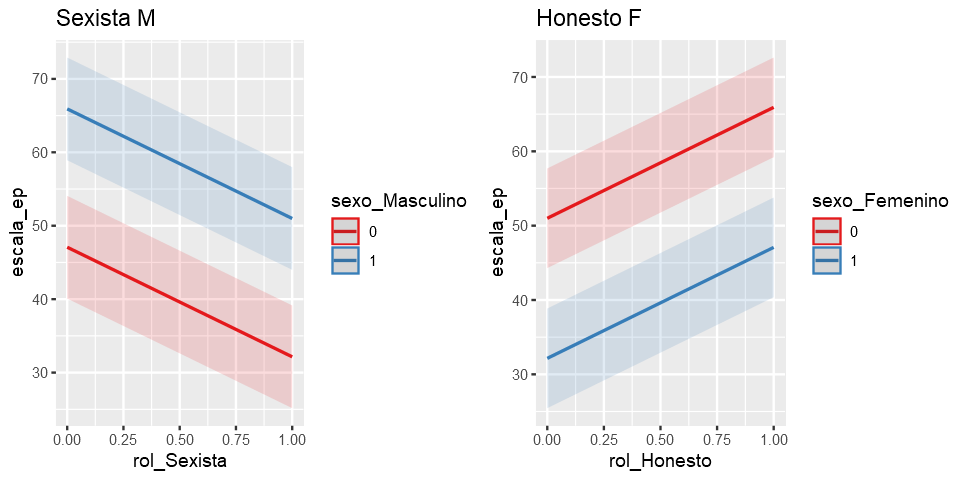

In [7]:
suppressMessages(library(cowplot))
options(repr.plot.width=8, repr.plot.height=4)
plot_grid(plt_sexM,
    plt_sexF,
    #labels = c('Modelos con variables distintas'),
    label_size = 3,
    ncol=2
)

Hacemos la prueba de hipótesis:

$H_{0}$: $\beta_{0} = 0$

$H_{A}$: $\beta_{0} \ne 0$

En los tres modelos se observa que el valor _p_ es demasiado pequeño, por lo cual se rechaza la hipótesis nula y se dice que en ninguno de los modelos la ordenada al origen es 0, por lo cual se puede decir que el modelo ayudará a calcular la escala_ep, usando los valores de las variables sexo y rol.

Siguiendo con la significancia de las variables consideradas para la MLR:

$H_{0}$: $\beta_{1}=...=\beta_{n}= 0$

$H_{a}$: No existe $\beta_{n} = 0$

En los tres modelos se observa que el valor _p_ es demasiado pequeño, por lo cual se rechaza la hipótesis nula y se dice que al parecer todas las variables consideradas en el modelo son significativas para predecir el valor de escala_ep.

Los tres modelos tienen un coeficiente de determinación $R^2 \approx .56$ lo cual nos dice dichos modelos tienen un ajuste regular.

De los resultados anteriores se pueden hacer las siguientes aseveraciones con sus respectivas reservas:

  - Las mujeres tienen menos escala_ep
  - A mayor machismo, menor escala_ep 